<a href="https://colab.research.google.com/github/Anuja-85/ML-Project1/blob/master/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! pip install -q kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{\r\n    "username": "anujagatkul",\r\n    "key": "37ccd5464754c5abc2e88fa74be38be2"\r\n}'}

In [4]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets list

ref                                                        title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/top-spotify-songs-2023                    Most Streamed Spotify Songs 2023                47KB  2023-08-26 11:04:57          15755        490  1.0              
prasad22/daily-transactions-dataset                        Daily Transactions Dataset                      34KB  2023-09-25 02:32:21            629         24  1.0              
joebeachcapital/students-performance                       Students Performance                             2KB  2023-08-31 00:50:11           5511        140  1.0              
carlmcbrideellis/zzzs-lightweight-training-dataset-target  Zzzs: Lightweight training dataset + target    185M

In [8]:
dataset_name = 'chitwanmanchanda/fraudulent-transactions-data'

In [9]:
!kaggle datasets download -d {dataset_name}

 96% 171M/178M [00:02<00:00, 91.7MB/s]
100% 178M/178M [00:02<00:00, 62.9MB/s]


In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
#! pip install opendatasets

In [11]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

warnings.filterwarnings('ignore')

In [12]:
df = pd.read_csv('/content/fraudulent-transactions-data.zip')

In [13]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [14]:
df.shape

(6362620, 11)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [16]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [17]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [34]:
# we will drop this kind of imbalance feature
df['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [35]:
import pandas as pd

# Select only numeric columns
numeric_columns = df.select_dtypes(include=['int64','float64'])

# Calculate quantiles for numeric columns
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3 - Q1

# The rest of your code to detect outliers should remain the same
def detect_outliers(column):
    lower_bound = Q1[column] - 1.5 * IQR[column]
    upper_bound = Q3[column] + 1.5 * IQR[column]
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    if outliers.empty:
        return None, 0.0
    else:
        percentage = (len(outliers) / len(df)) * 100
        return column, percentage

columns_with_outliers = [detect_outliers(column) for column in numeric_columns.columns]
columns_with_outliers = [(column, percentage) for column, percentage in columns_with_outliers if column is not None]

for column, percentage in columns_with_outliers:
    print(f"Column: {column}, Percentage of outliers: {percentage:.2f}%")

Column: step, Percentage of outliers: 1.61%
Column: amount, Percentage of outliers: 5.31%
Column: oldbalanceOrg, Percentage of outliers: 17.49%
Column: newbalanceOrig, Percentage of outliers: 16.56%
Column: oldbalanceDest, Percentage of outliers: 12.36%
Column: newbalanceDest, Percentage of outliers: 11.61%
Column: isFraud, Percentage of outliers: 0.13%
Column: isFlaggedFraud, Percentage of outliers: 0.00%


In [46]:
# removing outliers
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-1.5*IQR
    upper_range=Q3+1.5*IQR
    return lower_range,upper_range

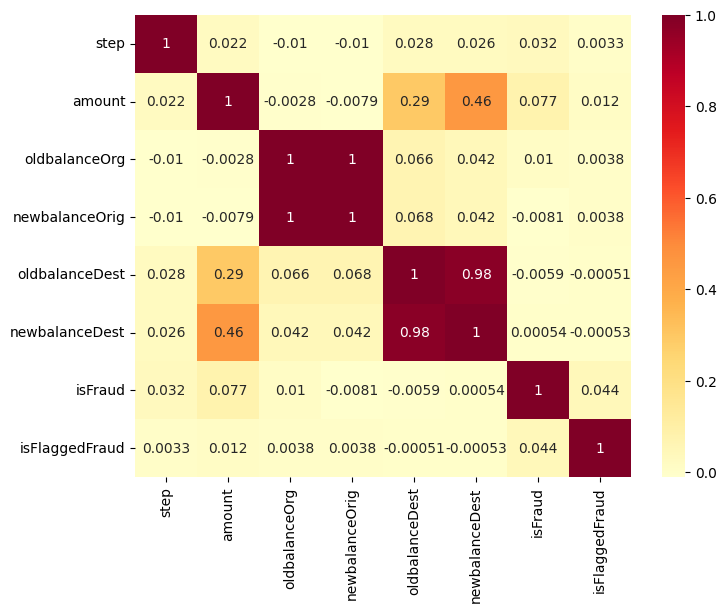

In [36]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrRd')
plt.show()

<Axes: xlabel='isFraud', ylabel='isFlaggedFraud'>

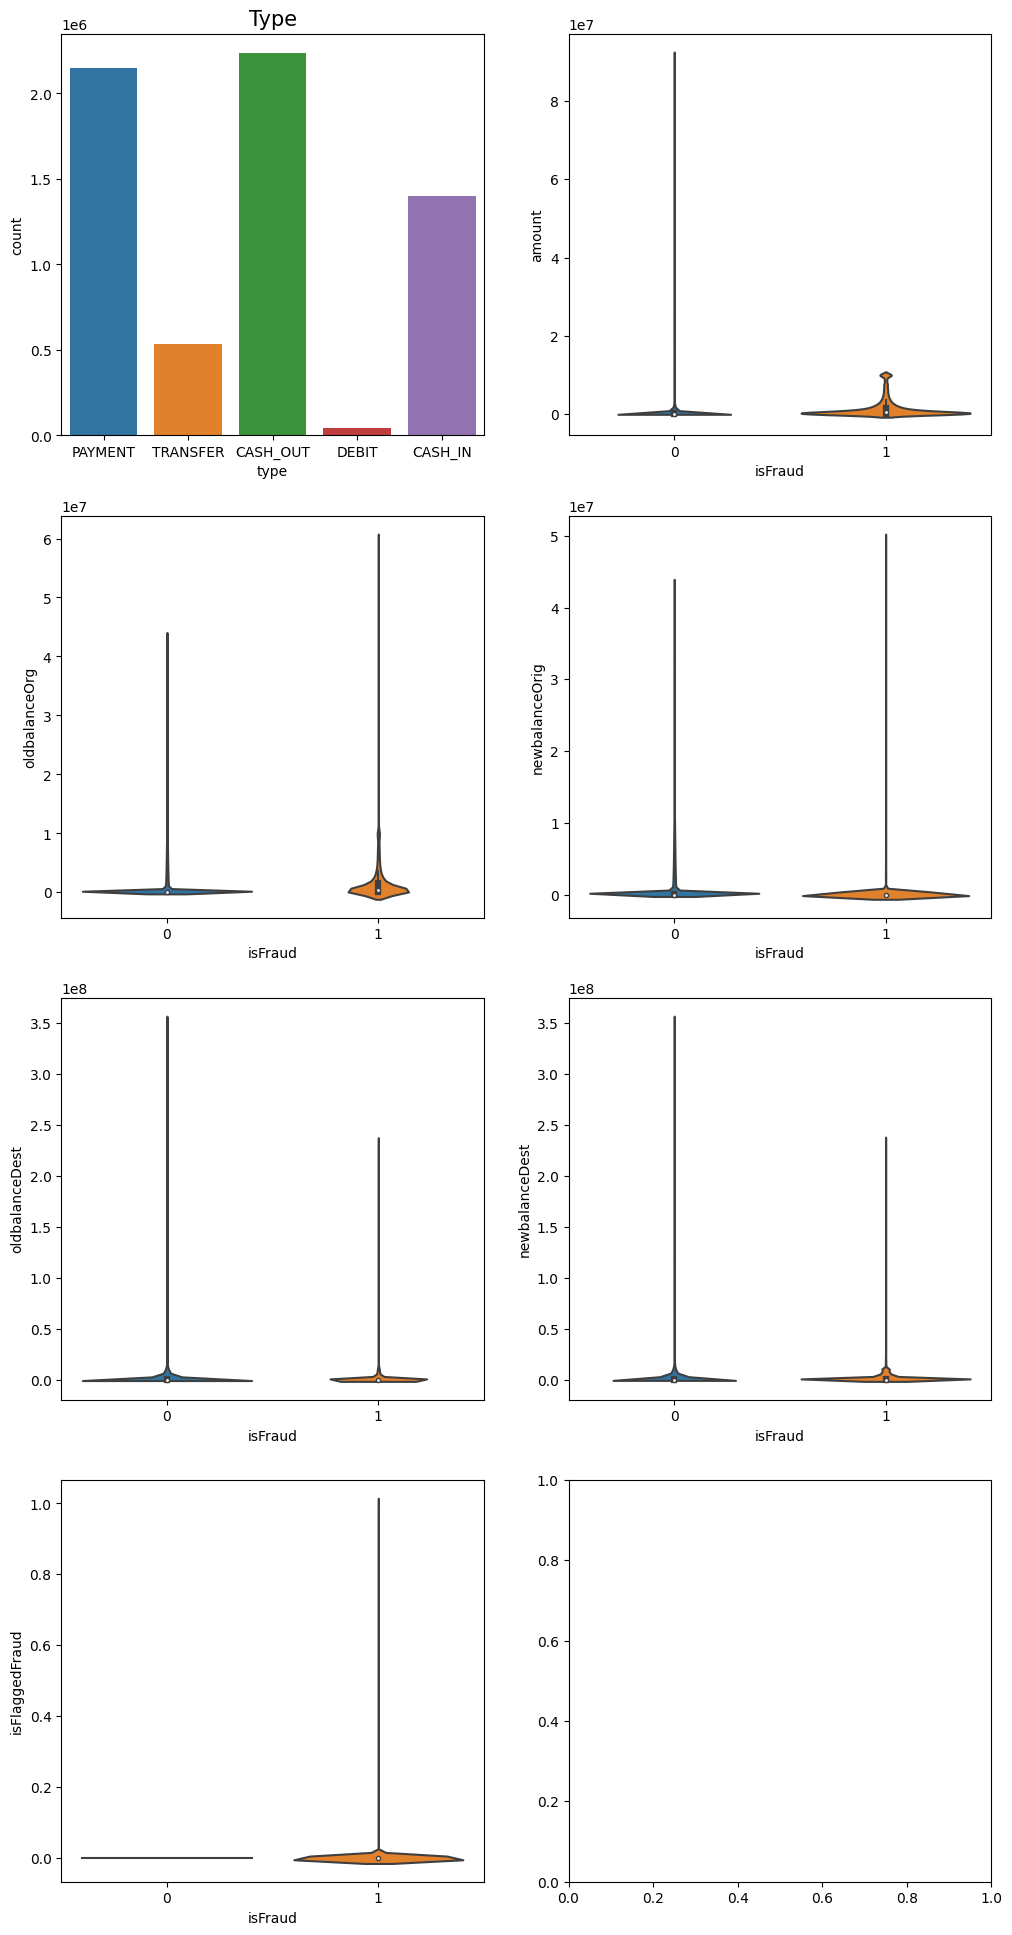

In [19]:
fig, ax = plt.subplots(4, 2, figsize=(12, 24))
sns.countplot(x=df.type, ax=ax[0][0]).set_title('Type', size=15)
sns.violinplot(x=df.isFraud, y=df['amount'], ax=ax[0][1])
sns.violinplot(x=df.isFraud, y=df['oldbalanceOrg'], ax=ax[1][0])
sns.violinplot(x=df.isFraud, y=df['newbalanceOrig'], ax=ax[1][1])
sns.violinplot(x=df.isFraud, y=df['oldbalanceDest'], ax=ax[2][0])
sns.violinplot(x=df.isFraud, y=df['newbalanceDest'], ax=ax[2][1])
sns.violinplot(x=df.isFraud, y=df['isFlaggedFraud'], ax=ax[3][0])

In [33]:
#! pip install pycaret

In [24]:
from pycaret.classification import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [25]:
df1=df.drop(['step','nameOrig','nameDest','isFlaggedFraud'],axis=1)

In [26]:
df_train, df_test = train_test_split(df1, random_state =100 , test_size = 0.3)

In [27]:
setup_df = setup(data=df_train, target='isFraud',
                 session_id=100, data_split_stratify=True,
                 verbose=False, remove_outliers=True)


In [29]:
#models = compare_models(n_select=3)
#models

In [45]:
#xgb = create_model("xgboost")

In [47]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
x, y = smote.fit_resample(x, y)

ValueError: ignored

In [38]:
x=df.drop(['isFraud'],axis=1)
y=df['isFraud']

In [41]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(4771965, 10)
(1590655, 10)
(4771965,)
(1590655,)


In [44]:
#from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain_sc = sc.fit_transform(xtrain)
xtest_sc=sc.fit_transform(xtest)

ValueError: ignored